# Project 2

## House Keeping
The csv is downloaded from kaggle and posted publicly to my github. Any person should be able to access through the following URL and run my code from their own computer (so long as I continue to host the CSV on my github).

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Show all rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#raw data link and read_csv
url = "https://raw.githubusercontent.com/YaroslawBagriy/SEIS-632-Project-2/refs/heads/main/project2data.txt"
df = pd.read_csv(url)
print('Data Loaded into Memory as "df"')

Data Loaded into Memory as "df"


## Exploratory Data Analysis

### Head and Tail

Examining the head/tail of the data in order to get a feel for the structure.

In [154]:
display(df.head())
display(df.tail())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### Head and Tail Observations

Multiple categorical data columns can be further broken down and need more investigation. From the head/tale (10 rows only!) Engine Fuel Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style all need additional work.

### Info, Shape and Data Types

Examining Info, Shapeand Data Types to better understand the data.

Float/Int data types are more likely to be continuous data vs. categorical data.

In [155]:
print(df.info())
print()
print(df.dtypes)
print()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Info/Dtypes/Shape Observations

Float/Int data types are more likely to be continuous data vs. categorical data, but just because something is Float/Int doesn't mean its continuous! I'm going to examine the data in each column, try to determine if it is continous or categorical and deal with null values. 

## Column by Column Data Examination

We're going to examine the data in each column, try to determine if it is continous or categorical and deal with null values. We want to either fill in columns with null values or drop them. Another thing to consider is to "format" all of the data in a way that you won't accidentally get multiple categories for the same data. "FORD" and "Ford" and "ford" and "ford " will all show up as different categories.

### Make

In [156]:
def column_process(column):
    raw_num = df[column].nunique()
    df[column] = df[column].apply(lambda x: x.strip().lower())
    processed_num = df[column].nunique()
    print('Nunique: ' + str(df[column].nunique()))
    print(df[column].unique())
    print('Blank Values: ' + str(df[column].isna().sum()))

column_process('Make')

Nunique: 48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston martin' 'land rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
Blank Values: 0


### Model

In [157]:
column_process('Model')

Nunique: 914
['1 series m' '1 series' '100' '124 spider' '190-class' '2 series' '200'
 '200sx' '240sx' '240' '2' '3 series gran turismo' '3 series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4 series gran coupe' '4 series' '400-class' '420-class' '456m'
 '458 italia' '4c' '4runner' '5 series gran turismo' '5 series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6 series gran coupe' '6 series' '600-class' '6000'
 '612 scaglietti' '626' '62' '650s coupe' '650s spider' '6' '7 series'
 '718 cayman' '740' '760' '780' '8 series' '80' '850' '86' '9-2x'
 '9-3 griffin' '9-3' '9-4x' '9-5' '9-7x' '9000' '900' '90' '911' '928'
 '929' '940' '944' '960' '968' 'a3' 'a4 allroad' 'a4' 'a5' 'a6' 'a7' 'a8'
 'acadia limited' 'acadia' 'accent' 'acclaim' 'accord crosstour'
 'accord hybrid' 'accord plug-in hybrid' 'accord' 'achieva'
 'activehybrid 5' 'activehybrid 7' 'activehybrid x6' 'aerio' 'aerostar'
 'alero' 'allante' 

### Model Analysis
This is a lot of values to go through.

### Engine Fuel Type

In [158]:
print('# unique: ' + str(df['Engine Fuel Type'].nunique()))
print('# blanks: ' + str(df['Engine Fuel Type'].isna().sum()))
print(df['Engine Fuel Type'].unique())

# unique: 10
# blanks: 3
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]


### Engine Fuel Type - NaN Values
Let's look at what rows have engine fuel type as null and try to figure out what the value is by looking at the same make/model from other years.



In [159]:
display(df[df['Engine Fuel Type'].isnull()].head())

print()

display(df[df['Model'] == 'verona'])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,suzuki,verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,suzuki,verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,suzuki,verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,suzuki,verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,suzuki,verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,suzuki,verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,suzuki,verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,suzuki,verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


### Engine Fuel Type NaN Values Continued

The 04s have np.NaN values, the 05/06s have regular unleaded. Let's change that value.

In [160]:
df.loc[df['Engine Fuel Type'].isna(), 'Engine Fuel Type'] = 'regular unleaded'
display(df[df['Engine Fuel Type'].isnull()].head())
display(df[df['Model'] == 'verona'])
df.isnull().sum()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,suzuki,verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,suzuki,verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,suzuki,verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,suzuki,verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,suzuki,verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,suzuki,verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Engine HP

Now we're going to look at engine HP. 

In [161]:
print('# unique: ' + str(df['Engine HP'].nunique()))
print('# blanks: ' + str(df['Engine HP'].isna().sum()))
df['Engine HP'].unique()

# unique: 356
# blanks: 69


array([ 335.,  300.,  230.,  320.,  172.,  160.,  130.,  158.,  240.,
        248.,  162.,  217.,  184.,  295.,  115.,  140.,  155.,  114.,
        100.,  241.,  180.,  177.,  228.,  121.,  148.,  194.,  218.,
        161.,  292.,  250.,  255.,  222.,   82.,  134.,  306.,  400.,
        425.,  350.,  332.,  268.,  282.,  275.,  201.,  442.,  562.,
        597.,  237.,  270.,  445.,  443.,  302.,  322.,  315.,   nan,
        101.,  135.,  485.,  238.,  515.,  543.,  631.,  604.,  620.,
        611.,  661.,  157.,  402.,  389.,  110.,  532.,  170.,  165.,
        125.,  641.,  535.,  153.,  144.,  188.,  372.,  108.,  168.,
        190.,  205.,  200.,  227.,  173.,  220.,  210.,  280.,  207.,
        265.,  260.,  290.,  285.,  390.,  225.,  185.,  150.,  430.,
        520.,  560.,  475.,  500.,  540.,  370.,  580.,  420.,  345.,
        195.,  193.,  208.,  181.,  236.,  186.,  252.,  310.,  333.,
        340.,  450.,  281.,  288.,  138.,  137.,  106.,  271.,  196.,
        212.,  278.,

### Engine HP NA values analysis
We need to peek at the NA values and see if there is any pattern when we look at the na data.

In [162]:
display(df[df['Engine HP'].isna()])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,fiat,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,fiat,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,fiat,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,lincoln,continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,lincoln,continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
2907,lincoln,continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,53915
2908,lincoln,continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,64915
4203,ford,escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,5657,29100
4204,ford,escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,30850
4205,ford,escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,26850


In [163]:
display(df['Engine HP'].isna().count())

np.int64(11914)

### Engine HP NA values analysis continued

There isn't an easy way to fill in these NA values. It's best if we drop them.

In [164]:
df.dropna(subset = ['Engine HP'], inplace= True)
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders       29
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3731
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Engine HP Conclusion
We dropped all null values in engine HP.

### Engine Cylinders
Engine Cylinders has 29 nan values

In [165]:
print('# unique: ' + str(df['Engine Cylinders'].nunique()))
print('# blanks: ' + str(df['Engine Cylinders'].isna().sum()))
df['Engine Cylinders'].unique()

# unique: 9
# blanks: 29


array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

### Engine Cylinders Continued

We have both zero as a value and np.nan. Lets look at the data for each of these specific subvalues.

#### Engine Cylinder NaN

In [166]:
df[df['Engine Cylinders'].isnull()].head(30)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,chevrolet,bolt ev,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,chevrolet,bolt ev,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,volkswagen,e-golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,volkswagen,e-golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,volkswagen,e-golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,volkswagen,e-golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5779,mitsubishi,i-miev,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,mitsubishi,i-miev,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,toyota,rav4 ev,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800
8695,mazda,rx-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523


### Engine Cylinders NaN analysis

THere are 9 that are electric and should be "0" instead on NaN. All of the mazdas should have a numerical value.

### Engine Cylinders "0" analysis

I think that some electric cars are not being classified with "0.0" for engine cylinders. I want to view the zero dataframe but also the "electric" dataframe and verify that they are all being classified in this manner.

In [167]:
print(df[df['Engine Cylinders']== 0].shape)
display(df[df['Engine Cylinders'] == 0])
print(df[df['Engine Fuel Type']=='electric'].shape)
display(df[df['Engine Fuel Type']=='electric'])

(13, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1680,mercedes-benz,b-class electric drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,mercedes-benz,b-class electric drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,mercedes-benz,b-class electric drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
5790,bmw,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5791,bmw,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5792,bmw,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5793,bmw,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,106,129,3916,43600
9867,chevrolet,spark ev,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,26685
9868,chevrolet,spark ev,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,chevrolet,spark ev,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170


(22, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1680,mercedes-benz,b-class electric drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,mercedes-benz,b-class electric drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,mercedes-benz,b-class electric drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
1983,chevrolet,bolt ev,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,chevrolet,bolt ev,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,volkswagen,e-golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,volkswagen,e-golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,volkswagen,e-golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,volkswagen,e-golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5779,mitsubishi,i-miev,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995


### Engine Cylinders Analysis
Electric shoud all be 0.0 for cylinders.

In [168]:
df.loc[(df['Engine Fuel Type'] == 'electric') & (df['Engine Cylinders'].isnull()), 'Engine Cylinders'] = 0.0

### Engine Cylinders Analysis
What to do about the Mazdas? See if there are comparable cars from other years and fill in that way.

In [169]:
display(df[df['Engine Cylinders'].isnull()].head(20))
print(df[df['Model'] == 'rx-7'].shape)
display(df[(df['Model'] == 'rx-8') | (df['Model'] == 'rx-7')].head(20))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,mazda,rx-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523
8696,mazda,rx-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8147
8697,mazda,rx-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8839
8698,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,mazda,rx-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,mazda,rx-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,mazda,rx-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560


(3, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,mazda,rx-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523
8696,mazda,rx-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8147
8697,mazda,rx-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8839
8698,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,mazda,rx-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,mazda,rx-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,mazda,rx-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,mazda,rx-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560


### Engine Cylinder Analysis
There's nothing in the dataset, google tells me that rx-7 and rx-8 have two cylinders, that's what I'm going to fill in.

In [170]:
df.loc[(df['Model'] == 'rx-7')|(df['Model'] == 'rx-8'), 'Engine Cylinders'] = 2
display(df[(df['Model'] == 'rx-8') | (df['Model'] == 'rx-7')].head(20))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,mazda,rx-7,1993,regular unleaded,255.0,2.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523
8696,mazda,rx-7,1994,regular unleaded,255.0,2.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8147
8697,mazda,rx-7,1995,regular unleaded,255.0,2.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8839
8698,mazda,rx-8,2009,premium unleaded (required),232.0,2.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,mazda,rx-8,2009,premium unleaded (required),212.0,2.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,mazda,rx-8,2009,premium unleaded (required),232.0,2.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,mazda,rx-8,2009,premium unleaded (required),232.0,2.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,mazda,rx-8,2009,premium unleaded (required),232.0,2.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,mazda,rx-8,2009,premium unleaded (required),212.0,2.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,mazda,rx-8,2009,premium unleaded (required),212.0,2.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560


### Cylinder analysis conclusion
Null values were changed to 0 for electric and 2 for the mazdas with null values

### Transmission Type Analysis
No null values, but I should also look an all the unique values to make sure there's not some column that could be classified as NA.

In [171]:
display(df.isna().sum())
print(df['Transmission Type'].nunique())
print(df['Transmission Type'].unique())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3731
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

5
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'UNKNOWN' 'DIRECT_DRIVE']


### Transmission Type Conclusion
Transmission type is good.

### Driven_Wheels Analysis
Check nunique for driven_wheels.

In [172]:
print(df['Driven_Wheels'].nunique())
print(df['Driven_Wheels'].unique())

4
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']


### Driven Wheels Conclusion
Driven_Wheels looks good. Four wheel drive and all wheel drive are similar but slightly different. I will leave them be instead of condensing into a single category.

In [173]:
print(df['Number of Doors'].nunique())
print(df['Number of Doors'].unique())

3
[ 2.  4.  3. nan]


In [174]:
display(df[df['Number of Doors'].isna()])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,ferrari,ff,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


In [175]:
display(df[df['Model']=='ff'])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,ferrari,ff,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4667,ferrari,ff,2014,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4668,ferrari,ff,2015,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


In [176]:
df.loc[(df['Model'] == 'ff') & (df['Number of Doors'].isna()), 'Number of Doors'] = 2.0
display(df[df['Model']=='ff'])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,ferrari,ff,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4667,ferrari,ff,2014,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4668,ferrari,ff,2015,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


### Number of Doors - Conclusion

We entered in a value of 2 for number of doors for the 2013 Ferrari FF. 

### Vehicle Size
Check unique/nunique for vehicle size.

In [177]:
print(df['Vehicle Size'].unique())
print(df['Vehicle Size'].nunique())

['Compact' 'Midsize' 'Large']
3


### Vehicle Size Conclusion
Vehicle size looks fine.

### Vechicle Style
Check unique/nunique for vehicle style.

In [178]:
print(df['Vehicle Style'].unique())
print(df['Vehicle Style'].nunique())

['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback' '2dr Hatchback'
 '4dr SUV' 'Passenger Minivan' 'Cargo Minivan' 'Crew Cab Pickup'
 'Regular Cab Pickup' 'Extended Cab Pickup' '2dr SUV' 'Cargo Van'
 'Convertible SUV' 'Passenger Van']
16


### Vehicle Style Conclusion
You could clean this up a bit. There's some redundant data re:4 vs. 3 door. However its fine.

### Highway MPG
We're getting to continuous variable rather than categorical variables. Its worth looking up how "electric" cars are rated as well, since they don't have "gallons" of fuel.

In [179]:
print(df['highway MPG'].unique())
print(df['highway MPG'].nunique())

display(df[df['Engine Fuel Type'] == 'electric'].head())

[ 26  28  27  25  24  20  21  22  35  34  31  30  32  33  23  36  29  45
  43  40  42  19  18  17  15  37  39  41  16  14  38  12 354  47  46  82
 110  44  13 105  99 102 111 106  48  53  50  74 109]
49


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1680,mercedes-benz,b-class electric drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,mercedes-benz,b-class electric drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,mercedes-benz,b-class electric drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
1983,chevrolet,bolt ev,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,chevrolet,bolt ev,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620


### Highway MPG Conclusion
Everything looks good.

### City MPG
Check this column. Its worth looking up how "electric" cars are rated as well, since they don't have "gallons" of fuel.

In [180]:
print(df['city mpg'].unique())
print(df['city mpg'].nunique())

display(df[df['Engine Fuel Type'] == 'electric'].head())

[ 19  20  18  17  16  26  23  22  21  24  15  25  29  28  32  31  30  14
  10  27  12  13   9  11   8  50  49  47  35  33  40  85 128  42  43  36
  44 126   7  34 121 137 129  39  41  37  53  55  51  54  58  78  38]
53


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1680,mercedes-benz,b-class electric drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,mercedes-benz,b-class electric drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,mercedes-benz,b-class electric drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
1983,chevrolet,bolt ev,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,chevrolet,bolt ev,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620


### City MPG
Looks good.

### Popularity
Check out popularity.

In [181]:
print(df['Popularity'].unique())
print(df['Popularity'].nunique())

[3916 3105  819  617 1013 2009  870  586  436 2774  113 2031  416   67
  210 1715  376  549 1439  535 2202   26  481 5657 1624 1720  520 1385
 1851 1158   61  640  873    2  155  204   86  238  454  259  258  613
  190  105   21  130  820]
47


### Popularity
Looks good.

### MSRP
Check out MSRP

In [182]:
print(df['MSRP'].unique())
print(df['MSRP'].nunique())

[46135 40650 36350 ... 46120 50620 50920]
6026


### MSRP Conclusion
MSRP looks good

### Dropping Market Category
Drop market category. Its complicated. A lot of null value and a lot of columns with multiple values

In [183]:
df.drop(columns = ['Market Category'], axis=1, inplace=True)

## Data Cleaning
The Data is cleaned and ready to be visualized and "understood" in a better manner

## Scratch

### Catagorical Dict

The whole point of this is to determine which variables are categorical and which are continuous vs. categorical. I'm creating a dictionary with each column as a key and the number of unique values as the value.

In [184]:
categorical_dict = {}
for column in df.columns:
    categorical_dict[column] = df[column].nunique()
for key, value in categorical_dict.items():
    print("{}: {}".format(key, value))

Make: 47
Model: 909
Year: 28
Engine Fuel Type: 9
Engine HP: 356
Engine Cylinders: 10
Transmission Type: 5
Driven_Wheels: 4
Number of Doors: 3
Vehicle Size: 3
Vehicle Style: 16
highway MPG: 49
city mpg: 53
Popularity: 47
MSRP: 6026


### Categorical Dict Observations

From "df.info" and the categorical dictionary:

Categorical Columns: Make, Model, Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style, Popularity, Cylinders, Number of Doors, Year?

Continuous Variables: Year, Horsepower, highway MPG, city MPG, Popularity, MSRP

## Cleaning Categorical Data

Examine categorical data column by column, see if there is are variations of name and adjust accordingly. Basic transformation includes stripping whitespace using .strip() and converting all letters to lower-case. Beyond that, inspect visually.

Creat lists of categorical/numeric columns

### Make

In [185]:
def column_process(column):
    raw_num = df[column].nunique()
    df[column] = df[column].apply(lambda x: x.strip().lower())
    processed_num = df[column].nunique()
    print(processed_num-raw_num)
    print(df[column].unique())

### Model

In [186]:
column_process('Model')

0
['1 series m' '1 series' '100' '124 spider' '190-class' '2 series' '200'
 '200sx' '240sx' '240' '2' '3 series gran turismo' '3 series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4 series gran coupe' '4 series' '400-class' '420-class' '456m'
 '458 italia' '4c' '4runner' '5 series gran turismo' '5 series'
 '500-class' '500' '500l' '500x' '550' '560-class' '570s' '575m' '57'
 '599' '5' '6 series gran coupe' '6 series' '600-class' '6000'
 '612 scaglietti' '626' '62' '650s coupe' '650s spider' '6' '7 series'
 '718 cayman' '740' '760' '780' '8 series' '80' '850' '86' '9-2x'
 '9-3 griffin' '9-3' '9-4x' '9-5' '9-7x' '9000' '900' '90' '911' '928'
 '929' '940' '944' '960' '968' 'a3' 'a4 allroad' 'a4' 'a5' 'a6' 'a7' 'a8'
 'acadia limited' 'acadia' 'accent' 'acclaim' 'accord crosstour'
 'accord hybrid' 'accord plug-in hybrid' 'accord' 'achieva'
 'activehybrid 5' 'activehybrid 7' 'activehybrid x6' 'aerio' 'aerostar'
 'alero' 'allante' 'allroad quattro' 

In [187]:
# Note about duplicate rows

# Duplicate Rows
# Some of the columns dropped had unique values that differentiated rows from each other. 
# These duplicate rows will be kept in the dataset, because the rows are still individual car types. 
# We just are not analyzing individual values that may make it unique from another row.
 
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (720, 15)


### Remove Outliers

In [188]:
# Select only numeric columns for calculating quantiles and IQR
numeric_df = df.select_dtypes(include=[float, int])

# Calculate Q1, Q3, and IQR on the numeric DataFrame
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame using the numeric DataFrame's IQR mask
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(9070, 15)


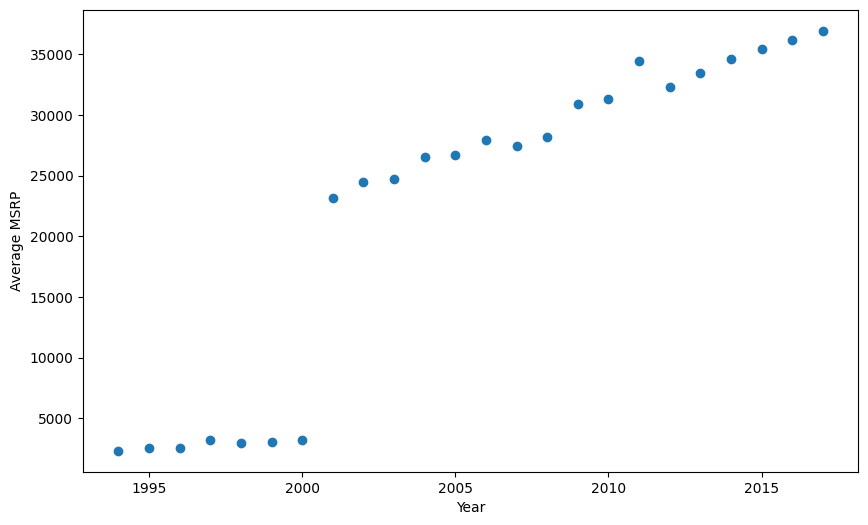

In [189]:
# Average Price vs Year

# Are cars getting more expensive over the years?

# Split the data by Year
year_data = df.groupby('Year')

# Pull out price column
price_column = year_data['MSRP']

# Calculate mean
yearly_avg_price = price_column.mean()

# Plot Bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(yearly_avg_price.index, yearly_avg_price.values)
ax.set_xlabel('Year')
ax.set_ylabel('Average MSRP')

# Disable scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

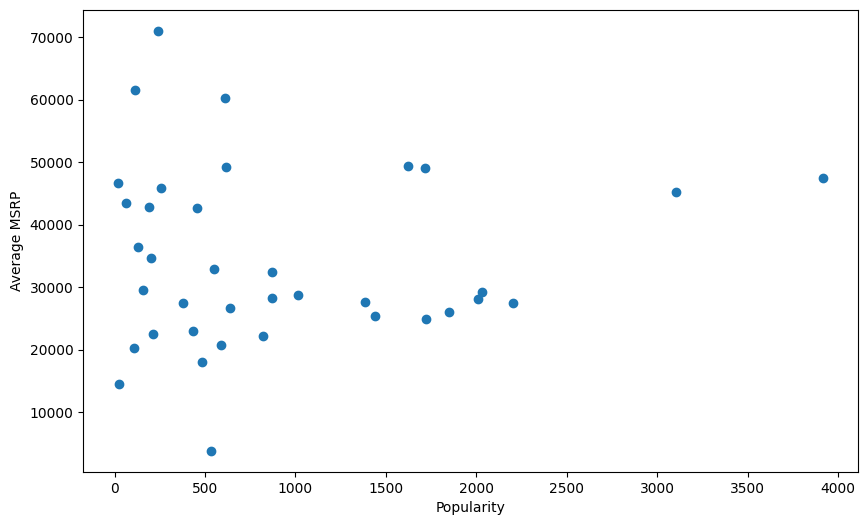

In [190]:
# Average Price vs Popularity

# Split the data by Popularity
year_data = df.groupby('Popularity')

# Pull out price column
price_column = year_data['MSRP']

# Calculate mean
yearly_avg_price = price_column.mean()

# Plot Bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(yearly_avg_price.index, yearly_avg_price.values)
ax.set_xlabel('Popularity')
ax.set_ylabel('Average MSRP')

# Disable scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

# Almost no correlation between popularity and price

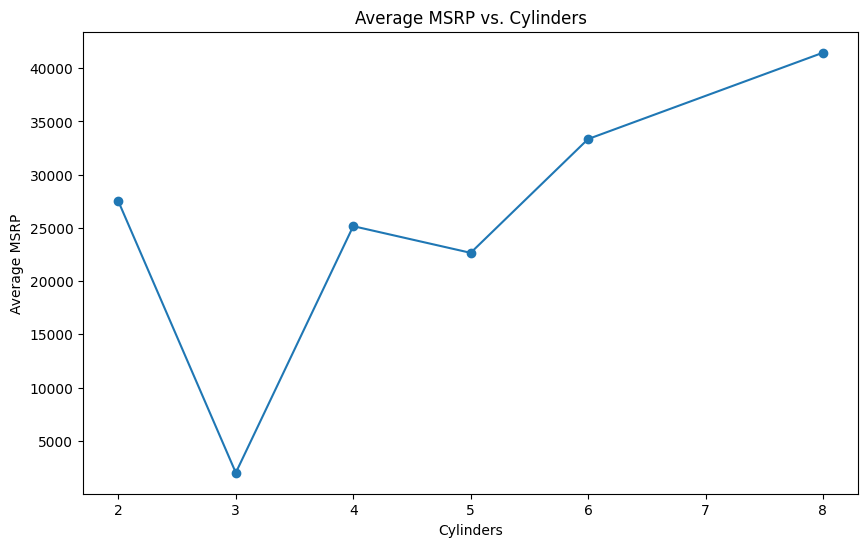

In [191]:
# Average Price vs Cylindars

# Calculate average price per cylinder count
cylinder_data_group = df.groupby('Engine Cylinders')

# Pull out price column
price_column = cylinder_data_group['MSRP']

# Calculate mean
average_price_per_cylinder = price_column.mean()

# Plot the result
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(average_price_per_cylinder.index, average_price_per_cylinder.values, marker='o', linestyle='-')
ax.set_xlabel('Cylinders')
ax.set_ylabel('Average MSRP')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis
plt.title('Average MSRP vs. Cylinders')
plt.show()

# Interesting to see how Average MSRP price increases dramatically as Engine Cylinders go up

In [192]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


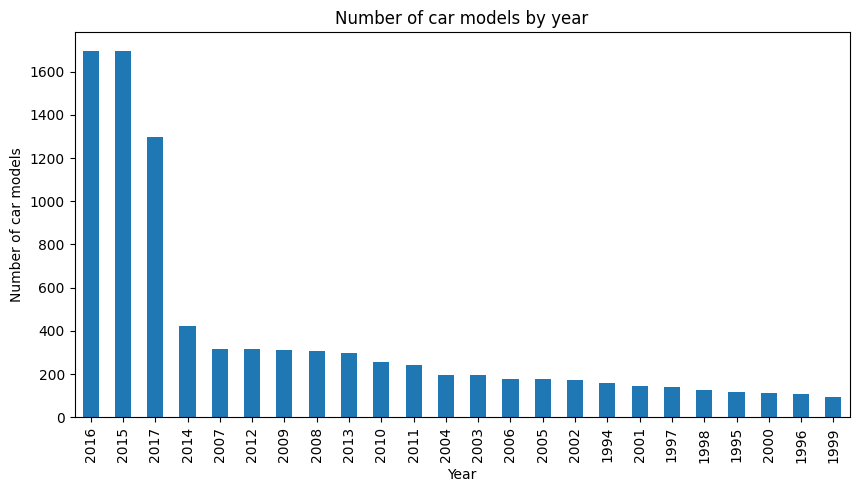

In [193]:
# Plot different features against one another (scatter), against frequency (histogram)

# Histogram
df.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of car models by year")
plt.ylabel('Number of car models')
plt.xlabel('Year');

/var/folders/p6/xr5l3xxs4092fm124qtzbfd00000gn/T/ipykernel_30345/3887228390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Transmission Type'],


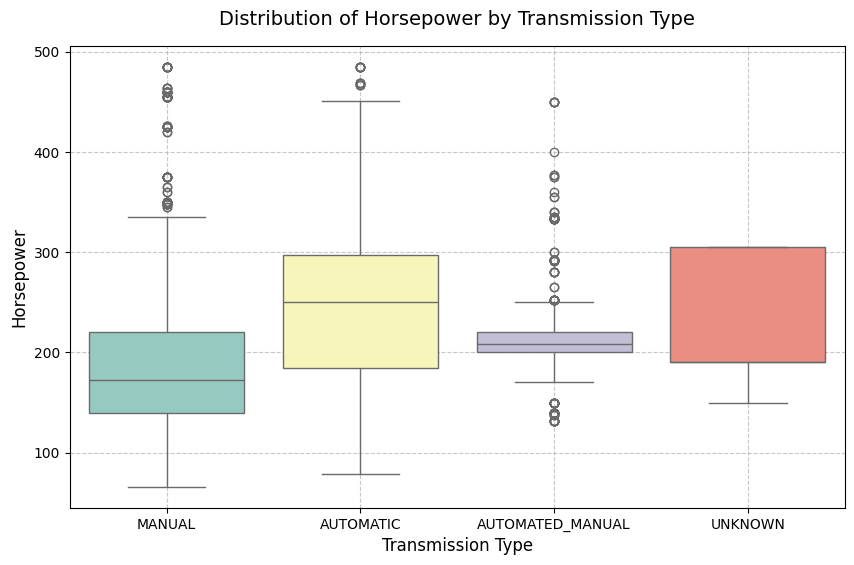

In [194]:
import seaborn as sns
 
# Set the style
plt.figure(figsize=(10, 6))
 
# Create boxplot
sns.boxplot(x=df['Transmission Type'], 
            y=df['Engine HP'], 
            data=df,
            palette='Set3')
 
# Customize the plot
plt.title('Distribution of Horsepower by Transmission Type', 
          fontsize=14, 
          pad=15)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Horsepower', fontsize=12)
 
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

/var/folders/p6/xr5l3xxs4092fm124qtzbfd00000gn/T/ipykernel_30345/2458556657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Engine Fuel Type'],


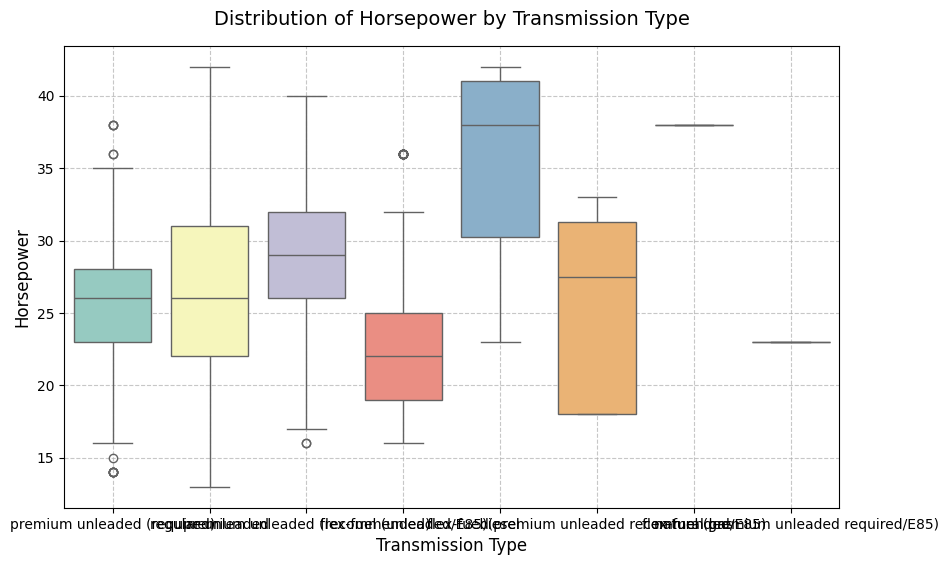

In [195]:
import seaborn as sns
 
# Set the style
plt.figure(figsize=(10, 6))
 
# Create boxplot
sns.boxplot(x=df['Engine Fuel Type'], 
            y=df['highway MPG'], 
            data=df,
            palette='Set3')
 
# Customize the plot
plt.title('Distribution of Horsepower by Transmission Type', 
          fontsize=14, 
          pad=15)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Horsepower', fontsize=12)
 
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

In [196]:
# 1. Cylinders vs Highway MPG (Yaro)
# 2. Average MSPR vs Cylinders (Yaro)
# 3. Boxplot of Distribution of Horsepower by Transmission Type (Savinay)
# 4. Boxplot of Distribution of Engine Fuel Type by Highway MPG (Savinay)
# 5. boxplot distribution of price by Fuel Type (categorical) (Jacob)
# 6. avgMSRP vs MPG city and MPG (with trend lines) (Jacob)
# 7. Distribution graph of electric (MPG) (Will)
# 8. Distribution graph of electric (MPG) (Will)
# 9. Some graph with Popularity (Jacob)
# 10. Some graph horsepower vs cylinders (Yaro)